In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("ticks")
plt.rcParams.update({'font.size': 32})
sns.set_context("poster", rc={"font.size":34,"axes.titlesize":34,"axes.labelsize":34, "lines.linewidth": 2})  
plt.rcParams['figure.figsize'] = 18, 12

pd.options.display.max_columns = 999
pd.options.display.max_rows = 9999


from datetime import datetime
str(datetime.now())




'2018-08-31 14:02:42.203984'

In [2]:
scavia = pd.read_csv('../../measurements/Scavia paper/TP load Erie.csv')

In [3]:
df = pd.read_csv('../../measurements/Excel Files/task 3/Western Basin/maumeeriver_average.csv', encoding="ISO-8859-1")

In [4]:
df.head()

,Year,Month,Day,Inflow volume [m3 d-1],Inflow temperature [°C],*Suspended sediment concentration [mg m-3],"*Orthophosphate, water, filtered, as phosphorus [mg m-3]","*Phosphorus, water, unfiltered, as phosphorus [mg m-3]","*Phosphorus, water, filtered, as phosphorus [mg m-3]","*Orthophosphate, water, filtered, as PO4 [mg m-3]",Inflow concentration of chlorophyll-a (Chla-P) [mg m-3],Inflow concentration of dissolved organic carbon (DOC) [mg m-3],Inflow concentration of dissolved inorganic carbon (DIC) [mg m-3],Inflow concentration of O2 [mg m-3],Inflow concentration of NO3 [mg m-3],Inflow concentration of NH4 [mg m-3],Inflow concentration of SO4 [mg m-3],Inflow concentration of aqueous iron (Fe2+) [mg m-3],Inflow concentration of Ca2+ [mg m-3],Inflow pH [-],Inflow concentration of CH4 [mg m-3],Inflow concentration of total solid iron (Fe3+) [mg m-3],Inflow concentration of aluminum (Al3+) [mg m-3],Inflow concentration of dissolved silica [mg m-3],"*Iron, suspended sediment, recoverable [mg m-3]","*Iron, water, unfiltered, recoverable [mg m-3]","*Iron, water, filtered [mg m-3]","*Suspended solids, water, unfiltered [mg m-3]"
0,1980,1,1,2.071026e+07,NaN,57000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1980,1,2,1.685691e+07,NaN,36000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1980,1,3,1.293015e+07,2.0,32000.0,NaN,220.0,110.0,NaN,NaN,7700.0,NaN,14100.0,NaN,10.0,62000.0,NaN,72000.0,7.7,NaN,NaN,NaN,7400.0,2600.0,2600.0,40.0,NaN
3,1980,1,4,1.012882e+07,NaN,28000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1980,1,5,8.159329e+06,NaN,31000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
from datetime import datetime
df['Date'] = df.apply(lambda x:datetime.strptime("{0} {1} {2} 00:00:00".format(int(x['Year']), int(x['Month']), int(x['Day'])), "%Y %m %d %H:%M:%S"),axis=1)

In [67]:
df.describe().T['count']

Year                                                                 13540.0
Month                                                                13540.0
Day                                                                  13540.0
Inflow volume [m3 d-1]                                               13540.0
Inflow temperature [°C]                                               5994.0
*Suspended sediment concentration [mg m-3]                            8280.0
*Orthophosphate, water, filtered, as phosphorus [mg m-3]               558.0
*Phosphorus, water, unfiltered, as phosphorus [mg m-3]                3253.0
*Phosphorus, water, filtered, as phosphorus [mg m-3]                   245.0
*Orthophosphate, water, filtered, as PO4 [mg m-3]                      558.0
Inflow concentration of chlorophyll-a (Chla-P) [mg m-3]                  5.0
Inflow concentration of dissolved organic carbon (DOC) [mg m-3]        169.0
Inflow concentration of dissolved inorganic carbon (DIC) [mg m-3]       74.0

Text(0.5,0,'')

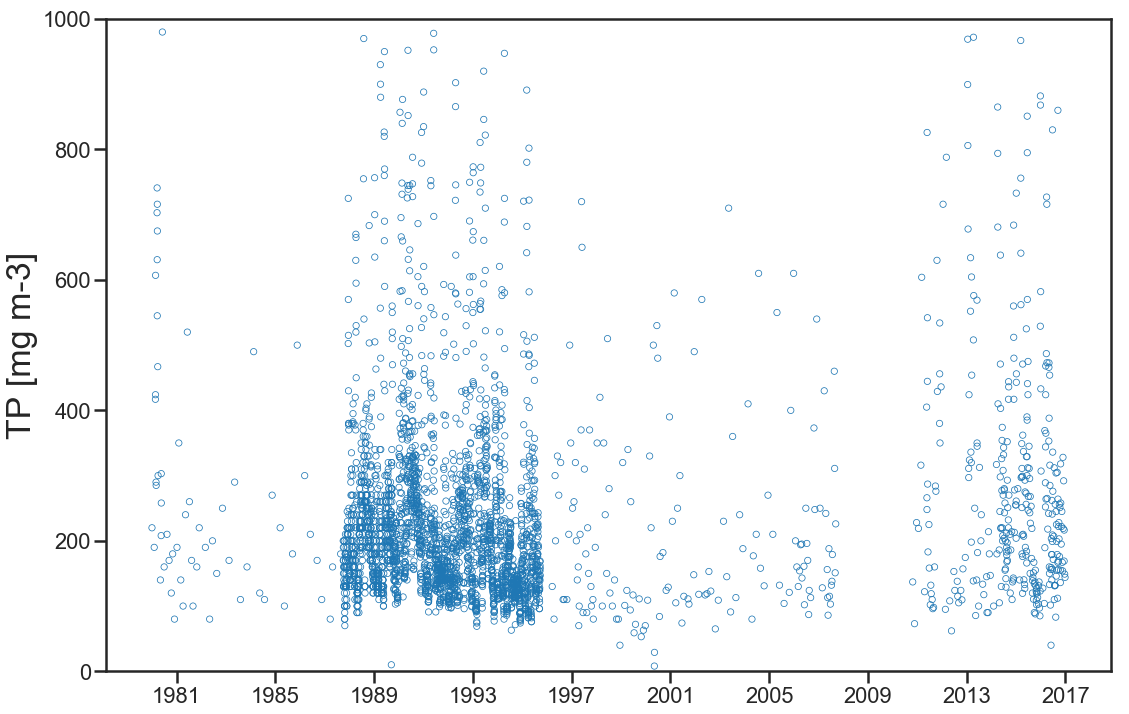

In [7]:
# fig = plt.figure(figsize=(20,12))
sns.scatterplot(data=df, x='Date', y='*Phosphorus, water, unfiltered, as phosphorus [mg m-3]', facecolor='none', edgecolor=sns.color_palette()[0], lw=2,s=40)
# plt.legend(['TP [mg m-3]'])
plt.ylabel('TP [mg m-3]')
plt.ylim(0,1000)
plt.xlabel('')

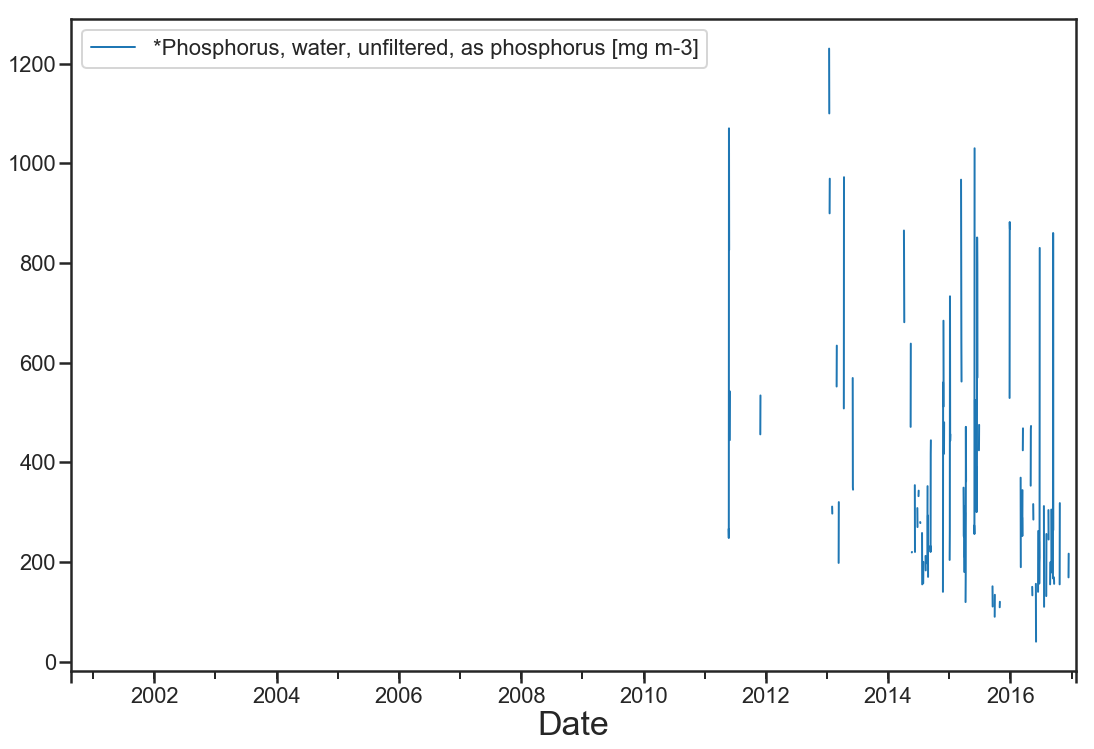

In [8]:
df[-6000:].plot(x='Date', y='*Phosphorus, water, unfiltered, as phosphorus [mg m-3]')

In [9]:
gdf = df.groupby(['Year']).mean()[-18:]

In [10]:
gdf['P load'] = gdf['*Phosphorus, water, unfiltered, as phosphorus [mg m-3]']*gdf['Inflow volume [m3 d-1]']

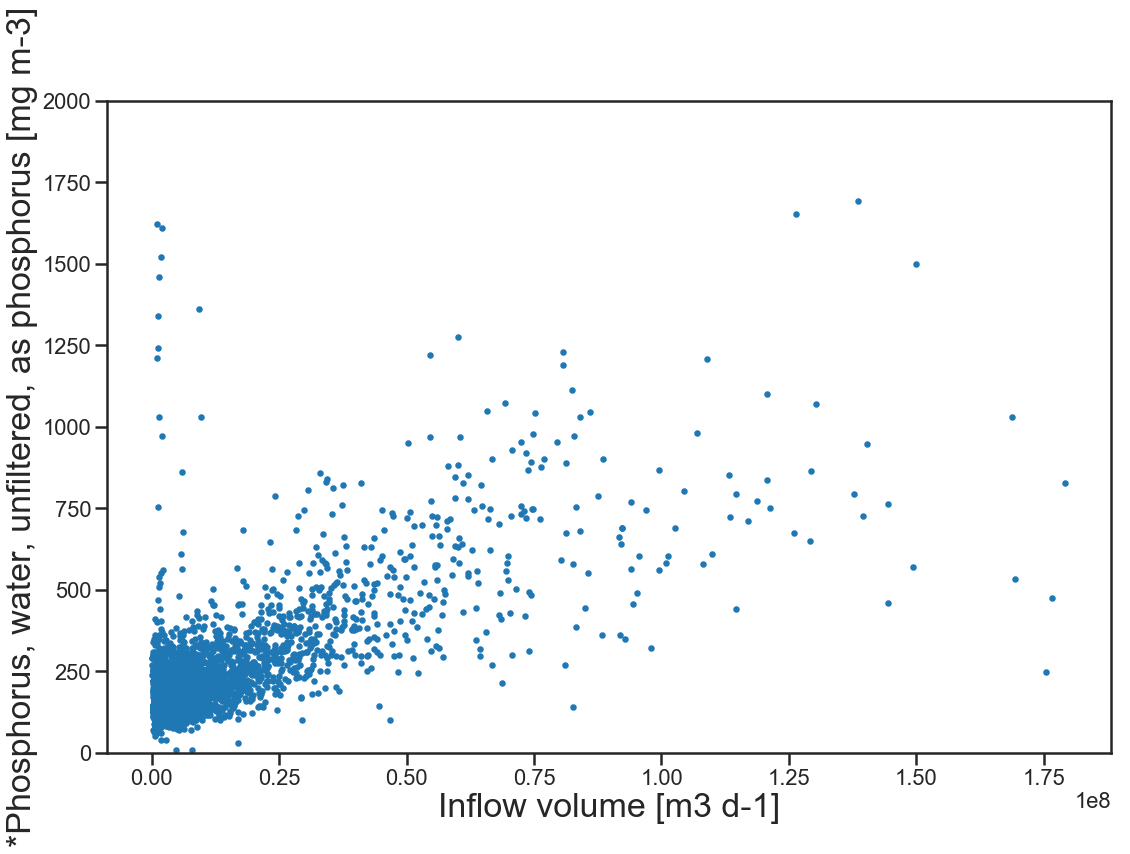

In [11]:
df.plot(y='*Phosphorus, water, unfiltered, as phosphorus [mg m-3]', x='Inflow volume [m3 d-1]', kind='scatter',ylim=(0,2000))

In [12]:
df['P load'] = df['*Phosphorus, water, unfiltered, as phosphorus [mg m-3]']*df['Inflow volume [m3 d-1]']

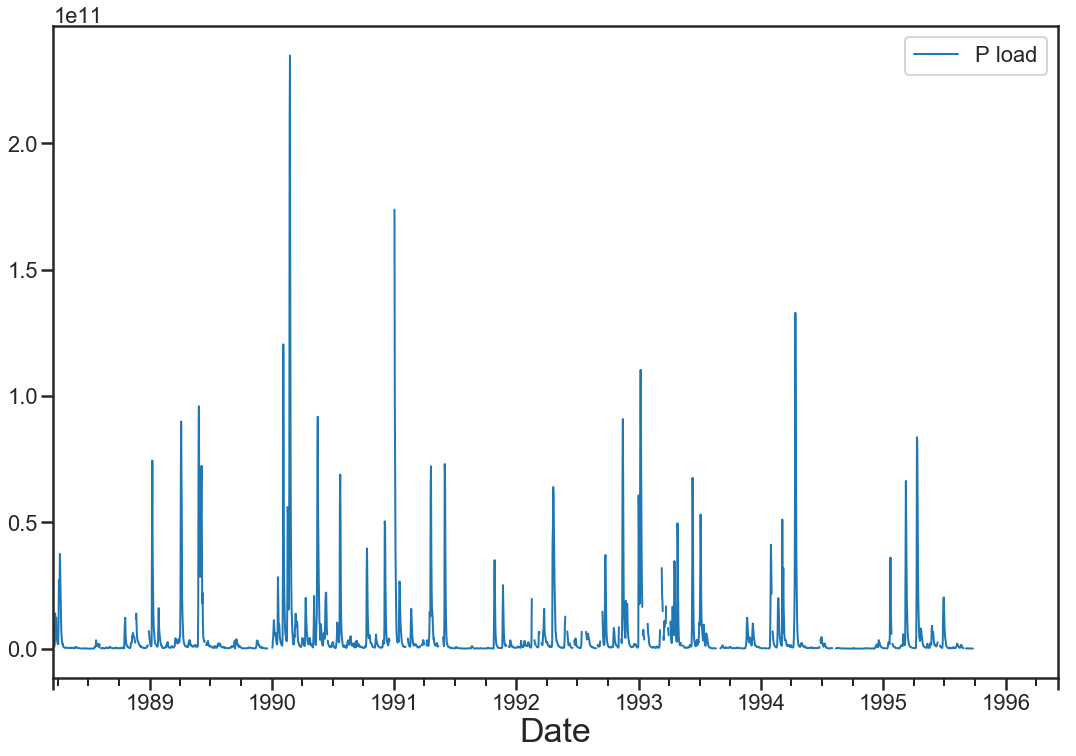

In [13]:
df[3000:6000].plot(y='P load',x='Date')

In [14]:
#prep
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MaxAbsScaler, QuantileTransformer

#models
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression, Ridge, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#validation libraries
from sklearn.cross_validation import KFold, StratifiedKFold
from IPython.display import display
from sklearn import metrics


/Users/imarkelo/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
mdf = df[['Date','*Phosphorus, water, unfiltered, as phosphorus [mg m-3]', 'Inflow volume [m3 d-1]', '*Suspended sediment concentration [mg m-3]', 'Inflow temperature [°C]']]

In [16]:
mdf.describe()

,"*Phosphorus, water, unfiltered, as phosphorus [mg m-3]",Inflow volume [m3 d-1],*Suspended sediment concentration [mg m-3],Inflow temperature [°C]
count,3253.000000,1.354000e+04,8.280000e+03,5994.000000
mean,246.418562,1.374651e+07,8.409676e+04,13.374920
std,192.457537,2.191189e+07,1.236383e+05,9.449523
min,8.000000,1.345617e+05,1.000000e+03,-0.100000
25%,140.000000,1.947474e+06,2.300000e+04,4.100000
50%,197.000000,5.198973e+06,4.100000e+04,13.300000
75%,278.000000,1.519629e+07,8.700000e+04,22.500000
max,4600.000000,2.566458e+08,1.880000e+06,31.300000


In [17]:
mdf.dropna().describe()

,"*Phosphorus, water, unfiltered, as phosphorus [mg m-3]",Inflow volume [m3 d-1],*Suspended sediment concentration [mg m-3],Inflow temperature [°C]
count,1785.000000,1.785000e+03,1.785000e+03,1785.000000
mean,266.758590,1.406173e+07,9.034323e+04,13.304883
std,196.094909,2.195128e+07,1.442556e+05,9.366321
min,8.000000,1.345617e+05,3.000000e+03,-0.100000
25%,153.000000,1.985396e+06,2.500000e+04,4.350000
50%,212.000000,5.945179e+06,4.650000e+04,12.500000
75%,298.000000,1.578041e+07,8.600000e+04,22.900000
max,2030.000000,1.792117e+08,1.770000e+06,30.000000


In [18]:
mdfna = mdf.dropna()

In [19]:
mdfna.tail()

,Date,"*Phosphorus, water, unfiltered, as phosphorus [mg m-3]",Inflow volume [m3 d-1],*Suspended sediment concentration [mg m-3],Inflow temperature [°C]
13410,2016-09-18,156.0,5284603.179,36000.0,23.2
13414,2016-09-22,222.0,3388507.131,39000.0,24.4
13418,2016-09-26,228.0,1447149.436,37000.0,21.9
13421,2016-09-29,203.0,2829464.619,31000.0,18.2
13425,2016-10-03,256.0,5810616.922,61000.0,18.9


In [20]:
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pylab import rc, plot
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split
from pandas import read_csv, DataFrame
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import ml_metrics, string, re, pylab as pl
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, explained_variance_score, accuracy_score
from sklearn import svm

In [21]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.svm import NuSVC
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

classifiers = [
    BernoulliNB(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    ExtraTreesClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    LabelPropagation(),
    LabelSpreading(),
    LinearDiscriminantAnalysis(),
    LinearSVC(),
    LogisticRegression(),
    LogisticRegressionCV(),
    MLPClassifier(),
    NearestCentroid(),
    RandomForestClassifier(n_estimators=1000, min_samples_leaf=1, random_state=1, n_jobs=6),
    RidgeClassifier(),
    RidgeClassifierCV(),
    SVC(),
    GradientBoostingClassifier(),
    LinearSVC(),
    LogisticRegression(),
    LogisticRegressionCV(),
    SGDClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    ExtraTreesClassifier(),
    KNeighborsClassifier(),
    MLPClassifier(),
    RandomForestClassifier(),
    RidgeClassifierCV(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    ExtraTreesClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
]

In [22]:
df[df.columns[3:]].corr()['*Phosphorus, water, unfiltered, as phosphorus [mg m-3]']

Inflow volume [m3 d-1]                                               0.644574
Inflow temperature [°C]                                             -0.041222
*Suspended sediment concentration [mg m-3]                           0.693184
*Orthophosphate, water, filtered, as phosphorus [mg m-3]             0.631030
*Phosphorus, water, unfiltered, as phosphorus [mg m-3]               1.000000
*Phosphorus, water, filtered, as phosphorus [mg m-3]                 0.517077
*Orthophosphate, water, filtered, as PO4 [mg m-3]                    0.630567
Inflow concentration of chlorophyll-a (Chla-P) [mg m-3]              0.332129
Inflow concentration of dissolved organic carbon (DOC) [mg m-3]      0.487277
Inflow concentration of dissolved inorganic carbon (DIC) [mg m-3]    0.046277
Inflow concentration of O2 [mg m-3]                                 -0.180925
Inflow concentration of NO3 [mg m-3]                                 0.171959
Inflow concentration of NH4 [mg m-3]                            

In [23]:
mdfna.corr()['*Phosphorus, water, unfiltered, as phosphorus [mg m-3]']

*Phosphorus, water, unfiltered, as phosphorus [mg m-3]    1.000000
Inflow volume [m3 d-1]                                    0.684550
*Suspended sediment concentration [mg m-3]                0.744902
Inflow temperature [°C]                                  -0.018808
Name: *Phosphorus, water, unfiltered, as phosphorus [mg m-3], dtype: float64

In [24]:
metrics = [mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, explained_variance_score]

In [25]:
models = []
models.append(RandomForestRegressor(n_estimators=10000, min_samples_leaf=5, n_jobs=6))
models.append(linear_model.Ridge())
models.append(linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0]))
models.append(linear_model.LassoCV(alphas=[0.1, 1.0, 10.0], positive=True))
models.append(linear_model.ElasticNetCV(alphas=[0.1, 1.0, 10.0]))
models.append(linear_model.Lars())
models.append(linear_model.LassoLarsCV())
models.append(linear_model.Lasso(positive=True))
models.append(linear_model.OrthogonalMatchingPursuitCV())
models.append(linear_model.BayesianRidge())
models.append(linear_model.ElasticNet(positive=True))
models.append(linear_model.LinearRegression())
models.append(linear_model.HuberRegressor())

In [26]:
df['DOY'] = df.Date.dt.dayofyear

In [27]:
df['TP (unfilt) [mg m-3]'] = df['*Phosphorus, water, unfiltered, as phosphorus [mg m-3]']

In [28]:
col = list(df.columns)
col.remove('*Phosphorus, water, unfiltered, as phosphorus [mg m-3]')
col.remove('P load')
col.remove('Date')
col.remove('Inflow concentration of CH4 [mg m-3]')
col.remove('Inflow concentration of total solid iron (Fe3+) [mg m-3]')
col.remove('Inflow concentration of aqueous iron (Fe2+) [mg m-3]')

In [29]:
# First lets try to predict suspended sediments

In [30]:
tdf=df[col[3:]]

In [31]:
tdf.head()

,Inflow volume [m3 d-1],Inflow temperature [°C],*Suspended sediment concentration [mg m-3],"*Orthophosphate, water, filtered, as phosphorus [mg m-3]","*Phosphorus, water, filtered, as phosphorus [mg m-3]","*Orthophosphate, water, filtered, as PO4 [mg m-3]",Inflow concentration of chlorophyll-a (Chla-P) [mg m-3],Inflow concentration of dissolved organic carbon (DOC) [mg m-3],Inflow concentration of dissolved inorganic carbon (DIC) [mg m-3],Inflow concentration of O2 [mg m-3],Inflow concentration of NO3 [mg m-3],Inflow concentration of NH4 [mg m-3],Inflow concentration of SO4 [mg m-3],Inflow concentration of Ca2+ [mg m-3],Inflow pH [-],Inflow concentration of aluminum (Al3+) [mg m-3],Inflow concentration of dissolved silica [mg m-3],"*Iron, suspended sediment, recoverable [mg m-3]","*Iron, water, unfiltered, recoverable [mg m-3]","*Iron, water, filtered [mg m-3]","*Suspended solids, water, unfiltered [mg m-3]",DOY,TP (unfilt) [mg m-3]
0,2.071026e+07,NaN,57000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,1.685691e+07,NaN,36000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
2,1.293015e+07,2.0,32000.0,NaN,110.0,NaN,NaN,7700.0,NaN,14100.0,NaN,10.0,62000.0,72000.0,7.7,NaN,7400.0,2600.0,2600.0,40.0,NaN,3,220.0
3,1.012882e+07,NaN,28000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
4,8.159329e+06,NaN,31000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN


In [32]:
tdf.describe()

,Inflow volume [m3 d-1],Inflow temperature [°C],*Suspended sediment concentration [mg m-3],"*Orthophosphate, water, filtered, as phosphorus [mg m-3]","*Phosphorus, water, filtered, as phosphorus [mg m-3]","*Orthophosphate, water, filtered, as PO4 [mg m-3]",Inflow concentration of chlorophyll-a (Chla-P) [mg m-3],Inflow concentration of dissolved organic carbon (DOC) [mg m-3],Inflow concentration of dissolved inorganic carbon (DIC) [mg m-3],Inflow concentration of O2 [mg m-3],Inflow concentration of NO3 [mg m-3],Inflow concentration of NH4 [mg m-3],Inflow concentration of SO4 [mg m-3],Inflow concentration of Ca2+ [mg m-3],Inflow pH [-],Inflow concentration of aluminum (Al3+) [mg m-3],Inflow concentration of dissolved silica [mg m-3],"*Iron, suspended sediment, recoverable [mg m-3]","*Iron, water, unfiltered, recoverable [mg m-3]","*Iron, water, filtered [mg m-3]","*Suspended solids, water, unfiltered [mg m-3]",DOY,TP (unfilt) [mg m-3]
count,1.354000e+04,5994.000000,8.280000e+03,558.000000,245.000000,558.000000,5.0000,169.000000,74.000000,5538.000000,33.000000,579.000000,347.000000,260.000000,3312.000000,51.000000,237.000000,9.000000,11.000000,219.000000,15.000000,13540.000000,3253.000000
mean,1.374651e+07,13.374920,8.409676e+04,72.790323,71.959184,222.969534,37.3200,7369.763314,54.459459,10659.444465,24862.151515,100.190415,61054.178674,58830.384615,8.146863,38.431373,6408.481013,2264.444444,2282.727273,37.269863,226800.000000,182.821270,246.418562
std,2.191189e+07,9.449523,1.236383e+05,60.931637,53.496729,186.951488,15.2775,1704.619408,59.475836,2509.107705,11400.628503,129.546232,25710.511921,14991.562616,0.407698,47.639167,31671.987687,3368.174992,3111.488682,55.681714,161717.213502,105.604373,192.457537
min,1.345617e+05,-0.100000,1.000000e+03,4.000000,10.000000,11.000000,18.9000,4500.000000,30.000000,4300.000000,171.000000,9.000000,10100.000000,17000.000000,7.000000,10.000000,10.000000,340.000000,340.000000,0.000000,5000.000000,1.000000,8.000000
25%,1.947474e+06,4.100000,2.300000e+04,20.000000,20.000000,55.000000,29.9000,6440.000000,30.000000,8600.000000,15300.000000,26.000000,42750.000000,47150.000000,7.800000,10.000000,1700.000000,650.000000,600.000000,10.000000,102000.000000,91.000000,140.000000
50%,5.198973e+06,13.300000,4.100000e+04,66.000000,70.000000,202.000000,31.5000,7100.000000,30.000000,10700.000000,24900.000000,52.000000,58000.000000,58750.000000,8.200000,20.000000,5030.000000,960.000000,990.000000,19.000000,220000.000000,183.000000,197.000000
75%,1.519629e+07,22.500000,8.700000e+04,111.000000,110.000000,344.625000,51.7000,7860.000000,47.500000,12700.000000,34200.000000,117.500000,76000.000000,68975.000000,8.400000,40.000000,6700.000000,2200.000000,2400.000000,36.400000,352500.000000,274.000000,278.000000
max,2.566458e+08,31.300000,1.880000e+06,402.000000,350.000000,1230.000000,54.6000,15900.000000,390.000000,20000.000000,49100.000000,1200.000000,160000.000000,99000.000000,9.400000,230.000000,490000.000000,11000.000000,11000.000000,378.000000,514000.000000,366.000000,4600.000000


In [33]:
tdf = tdf.dropna(subset=['TP (unfilt) [mg m-3]'])

In [34]:
# tdf = tdf.fillna(tdf.mean())

In [35]:
# tdf['Inflow volume [m3 d-1]'].fillna(tdf.groupby('DOY')['Inflow volume [m3 d-1]'].transform('mean'))

In [36]:
tdf.describe()

,Inflow volume [m3 d-1],Inflow temperature [°C],*Suspended sediment concentration [mg m-3],"*Orthophosphate, water, filtered, as phosphorus [mg m-3]","*Phosphorus, water, filtered, as phosphorus [mg m-3]","*Orthophosphate, water, filtered, as PO4 [mg m-3]",Inflow concentration of chlorophyll-a (Chla-P) [mg m-3],Inflow concentration of dissolved organic carbon (DOC) [mg m-3],Inflow concentration of dissolved inorganic carbon (DIC) [mg m-3],Inflow concentration of O2 [mg m-3],Inflow concentration of NO3 [mg m-3],Inflow concentration of NH4 [mg m-3],Inflow concentration of SO4 [mg m-3],Inflow concentration of Ca2+ [mg m-3],Inflow pH [-],Inflow concentration of aluminum (Al3+) [mg m-3],Inflow concentration of dissolved silica [mg m-3],"*Iron, suspended sediment, recoverable [mg m-3]","*Iron, water, unfiltered, recoverable [mg m-3]","*Iron, water, filtered [mg m-3]","*Suspended solids, water, unfiltered [mg m-3]",DOY,TP (unfilt) [mg m-3]
count,3.253000e+03,1927.000000,3.108000e+03,557.000000,245.000000,557.000000,5.0000,169.000000,74.000000,1828.000000,33.000000,578.000000,346.000000,259.000000,531.000000,51.000000,236.000000,9.000000,11.000000,218.000000,15.000000,3253.000000,3253.000000
mean,1.305375e+07,13.428975,8.479574e+04,72.885099,71.959184,223.260323,37.3200,7369.763314,54.459459,10671.023039,24862.151515,100.273789,60970.520231,58857.915058,8.126711,38.431373,6432.241525,2264.444444,2282.727273,37.411468,226800.000000,183.452813,246.418562
std,2.046721e+07,9.368425,1.311883e+05,60.945226,53.496729,186.993187,15.2775,1704.619408,59.475836,2436.753651,11400.628503,129.642893,25700.405698,15014.001382,0.426184,47.639167,31737.186503,3368.174992,3111.488682,55.770328,161717.213502,103.116272,192.457537
min,1.345617e+05,-0.100000,3.000000e+03,4.000000,10.000000,11.000000,18.9000,4500.000000,30.000000,4700.000000,171.000000,9.000000,10100.000000,17000.000000,7.000000,10.000000,10.000000,340.000000,340.000000,0.000000,5000.000000,1.000000,8.000000
25%,1.964600e+06,4.500000,2.400000e+04,20.000000,20.000000,55.000000,29.9000,6440.000000,30.000000,8700.000000,15300.000000,26.000000,42725.000000,47100.000000,7.800000,10.000000,1737.500000,650.000000,600.000000,10.000000,102000.000000,97.000000,140.000000
50%,5.529261e+06,13.000000,4.500000e+04,66.000000,70.000000,202.000000,31.5000,7100.000000,30.000000,10700.000000,24900.000000,52.500000,58000.000000,58900.000000,8.100000,20.000000,5055.000000,960.000000,990.000000,19.200000,220000.000000,181.000000,197.000000
75%,1.426354e+07,22.900000,8.400000e+04,111.000000,110.000000,345.500000,51.7000,7860.000000,47.500000,12612.500000,34200.000000,117.750000,75950.000000,69050.000000,8.425000,40.000000,6702.500000,2200.000000,2400.000000,36.700000,352500.000000,272.000000,278.000000
max,1.792117e+08,30.500000,1.770000e+06,402.000000,350.000000,1230.000000,54.6000,15900.000000,390.000000,19000.000000,49100.000000,1200.000000,160000.000000,99000.000000,9.400000,230.000000,490000.000000,11000.000000,11000.000000,378.000000,514000.000000,366.000000,4600.000000


In [37]:
features = [tdf.columns[0], tdf.columns[-2]]
target = [tdf.columns[-1]]
train = tdf.sample(frac=0.99, random_state=1)
test = tdf.loc[~tdf.index.isin(train.index)]

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor method score: 0.4366209967614559
mean_squared_error : 12647.321719507167
r2_score : 0.3830461232196857
mean_absolute_error : 49.74797467839514
median_absolute_error : 27.347977054464025
explained_variance_score : 0.3830514453415773


<Figure size 720x720 with 0 Axes>

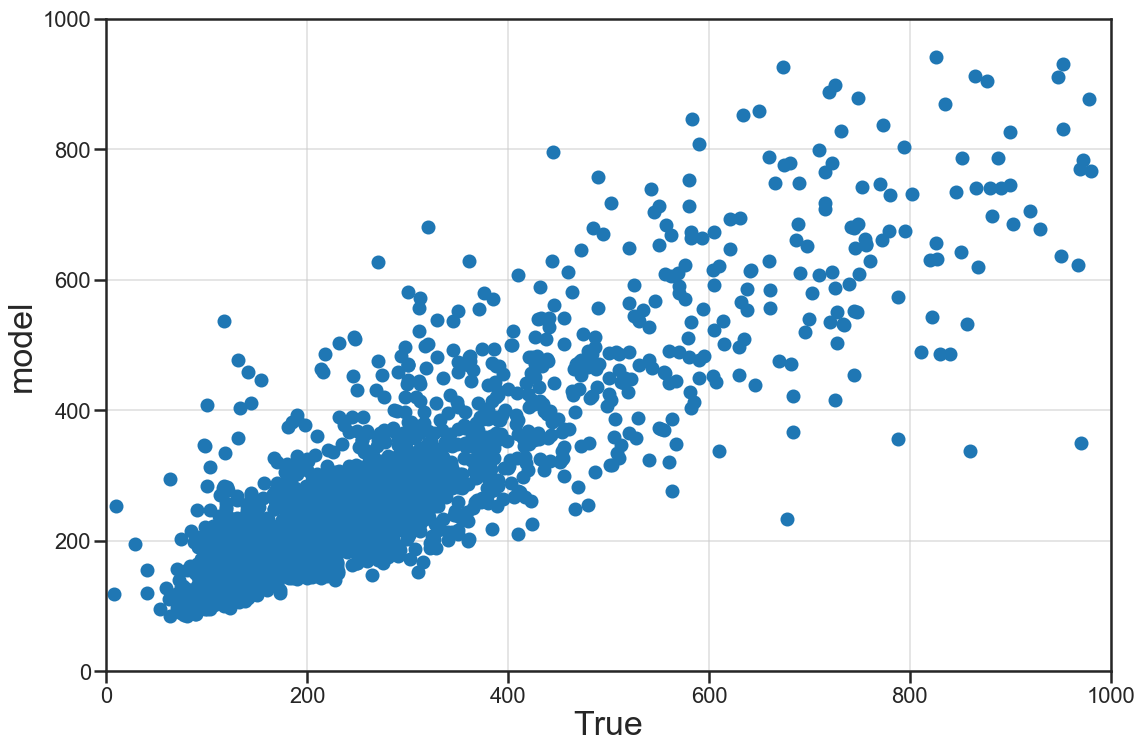

In [38]:
predicted_results = np.empty((len(models),len(test[target].values),))
results = {}
plt.figure(figsize=(10, 10)) 
for i,model in enumerate([RandomForestRegressor(n_estimators=10000, min_samples_leaf=5, n_jobs=6)]):
    name = str(model).split('(')[0]
    results[name] = {}
    model.fit(train[features], train[target])
    results[name] = {'score': model.score(test[features], test[target]), 'model':name}
    print(str(model).split('(')[0], 'method score:', results[name]['score'])
    
    for m in metrics:
        results[name][m.__name__] = m(model.predict(train[features]), train[target].values)
        print(m.__name__,':', results[name][m.__name__])
    predicted_results[i,:] = model.predict(test[features]).flatten()
    plt.figure()
    plt.scatter(x=train[target].values.flatten(), y=model.predict(train[features]).flatten())
#     plt.scatter(model.predict(test[features]), test[target].values)
#     plt.ylim(0,10)
    plt.ylabel('model')
    plt.xlabel('True')
    # plt.xlim(0,10)
    plt.grid(alpha=0.5)
    plt.ylim(0,1000)
    plt.xlim(0,1000)
    plt.show()

In [39]:
# df = df.dropna(subset=['TP (unfilt) [mg m-3]'])

In [40]:
df['model TP']=model.predict(df[features]).flatten()

In [41]:
df['model P load'] = df['model TP']*df['Inflow volume [m3 d-1]']*1e-9*365

In [42]:
df.groupby(['Year']).mean()

,Month,Day,Inflow volume [m3 d-1],Inflow temperature [°C],*Suspended sediment concentration [mg m-3],"*Orthophosphate, water, filtered, as phosphorus [mg m-3]","*Phosphorus, water, unfiltered, as phosphorus [mg m-3]","*Phosphorus, water, filtered, as phosphorus [mg m-3]","*Orthophosphate, water, filtered, as PO4 [mg m-3]",Inflow concentration of chlorophyll-a (Chla-P) [mg m-3],Inflow concentration of dissolved organic carbon (DOC) [mg m-3],Inflow concentration of dissolved inorganic carbon (DIC) [mg m-3],Inflow concentration of O2 [mg m-3],Inflow concentration of NO3 [mg m-3],Inflow concentration of NH4 [mg m-3],Inflow concentration of SO4 [mg m-3],Inflow concentration of aqueous iron (Fe2+) [mg m-3],Inflow concentration of Ca2+ [mg m-3],Inflow pH [-],Inflow concentration of CH4 [mg m-3],Inflow concentration of total solid iron (Fe3+) [mg m-3],Inflow concentration of aluminum (Al3+) [mg m-3],Inflow concentration of dissolved silica [mg m-3],"*Iron, suspended sediment, recoverable [mg m-3]","*Iron, water, unfiltered, recoverable [mg m-3]","*Iron, water, filtered [mg m-3]","*Suspended solids, water, unfiltered [mg m-3]",P load,DOY,TP (unfilt) [mg m-3],model TP,model P load
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,6.513661,15.756831,1.191028e+07,12.458333,93759.562842,NaN,385.384615,75.833333,NaN,NaN,10913.333333,NaN,12600.000000,NaN,159.166667,79500.000000,NaN,65333.333333,8.057692,NaN,NaN,NaN,5263.636364,3780.0,3790.0,27.500000,242642.857143,1.896195e+10,183.5,385.384615,244.746509,1824.871409
1981,6.526027,15.720548,1.491311e+07,14.050201,110602.739726,90.000000,222.727273,106.363636,275.000000,NaN,8650.000000,NaN,10213.155363,NaN,245.454545,80272.727273,NaN,72636.363636,8.106752,NaN,NaN,NaN,6160.000000,765.0,1446.0,20.000000,NaN,3.532759e+09,183.0,222.727273,259.161910,2491.094030
1982,6.526027,15.720548,2.008290e+07,13.414565,92317.808219,66.000000,174.000000,76.000000,202.200000,NaN,NaN,NaN,9277.254098,NaN,188.000000,67000.000000,NaN,57000.000000,8.091957,NaN,NaN,210.000000,4030.000000,2200.0,1360.0,141.500000,NaN,1.928489e+09,183.0,174.000000,293.716744,4152.215391
1983,6.526027,15.720548,1.318158e+07,12.709192,91419.178082,75.000000,182.500000,82.500000,230.500000,NaN,NaN,NaN,10510.754190,NaN,113.250000,72500.000000,NaN,58750.000000,8.233726,NaN,NaN,30.000000,4432.500000,NaN,NaN,20.000000,NaN,2.321782e+09,183.0,182.500000,248.102308,2056.666780
1984,6.513661,15.756831,1.268852e+07,12.326935,85722.627737,60.000000,247.500000,90.000000,184.000000,NaN,NaN,NaN,10651.702786,NaN,260.750000,70750.000000,NaN,50000.000000,8.022434,NaN,NaN,32.500000,3750.000000,NaN,NaN,40.000000,NaN,1.289897e+10,183.5,247.500000,250.712760,2257.841741
1985,6.526027,15.720548,1.456152e+07,14.259444,NaN,47.500000,250.000000,67.500000,145.750000,NaN,NaN,NaN,11034.311377,NaN,197.000000,75750.000000,NaN,59250.000000,8.224753,NaN,NaN,27.500000,4122.500000,NaN,NaN,53.750000,NaN,9.320597e+09,183.0,250.000000,259.118028,3005.539514
1986,6.526027,15.720548,1.525158e+07,12.601997,NaN,50.000000,197.500000,67.500000,153.250000,NaN,NaN,NaN,10739.531680,NaN,112.750000,77000.000000,NaN,76000.000000,8.404167,NaN,NaN,16.666667,6375.000000,NaN,NaN,12.000000,NaN,3.534721e+09,183.0,197.500000,264.704228,2211.675258
1987,6.526027,15.720548,7.093775e+06,12.897854,48804.347826,25.000000,191.704545,37.500000,76.750000,NaN,NaN,NaN,11542.636152,NaN,77.250000,88250.000000,NaN,67000.000000,8.610227,NaN,NaN,20.000000,124592.500000,NaN,NaN,18.250000,NaN,2.626116e+09,183.0,191.704545,202.744333,673.336621
1988,6.513661,15.756831,7.147888e+06,12.440196,45142.076503,55.000000,254.649621,77.500000,168.500000,NaN,NaN,NaN,10897.910864,NaN,125.500000,103500.000000,NaN,71500.000000,8.525000,NaN,NaN,17.500000,4282.500000,NaN,NaN,18.000000,NaN,2.074779e+09,183.5,254.649621,221.703981,752.319326


In [43]:
scavia.columns[0]

'Year'

(0, 12000)

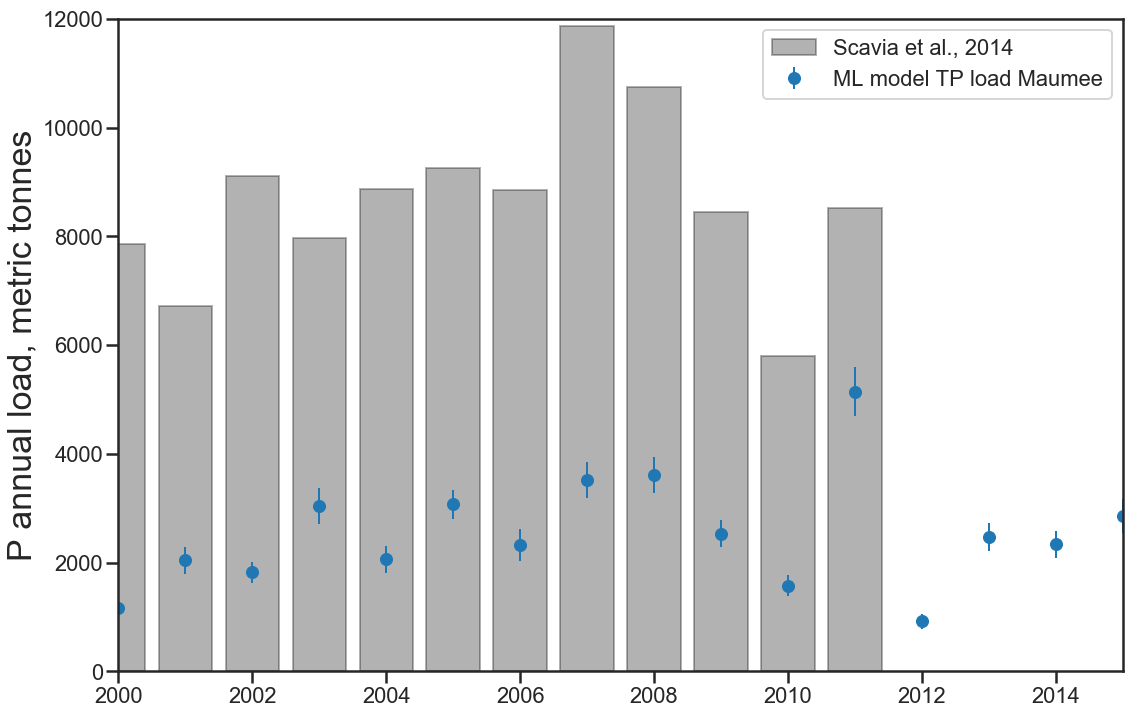

In [44]:
# plt.scatter(df.groupby(['Year']).mean().index, df.groupby(['Year']).mean()['model P load'], label='ML')
plt.bar(scavia[scavia.columns[0]], scavia[scavia.columns[1]], label='Scavia et al., 2014', color='k', alpha=0.3, edgecolor='k')
plt.errorbar(df.groupby(['Year']).mean().index, df.groupby(['Year']).mean()['model P load'], yerr=50*365*df.groupby(['Year']).mean()['Inflow volume [m3 d-1]']*1e-9, fmt='o', label='ML model TP load Maumee')
plt.legend()
plt.ylabel('P annual load, metric tonnes')
plt.xlim(2000,2015)
plt.ylim(0,12000)

# df.groupby(['Year']).mean().plot(y='model P load',xlim=(1990,2015))

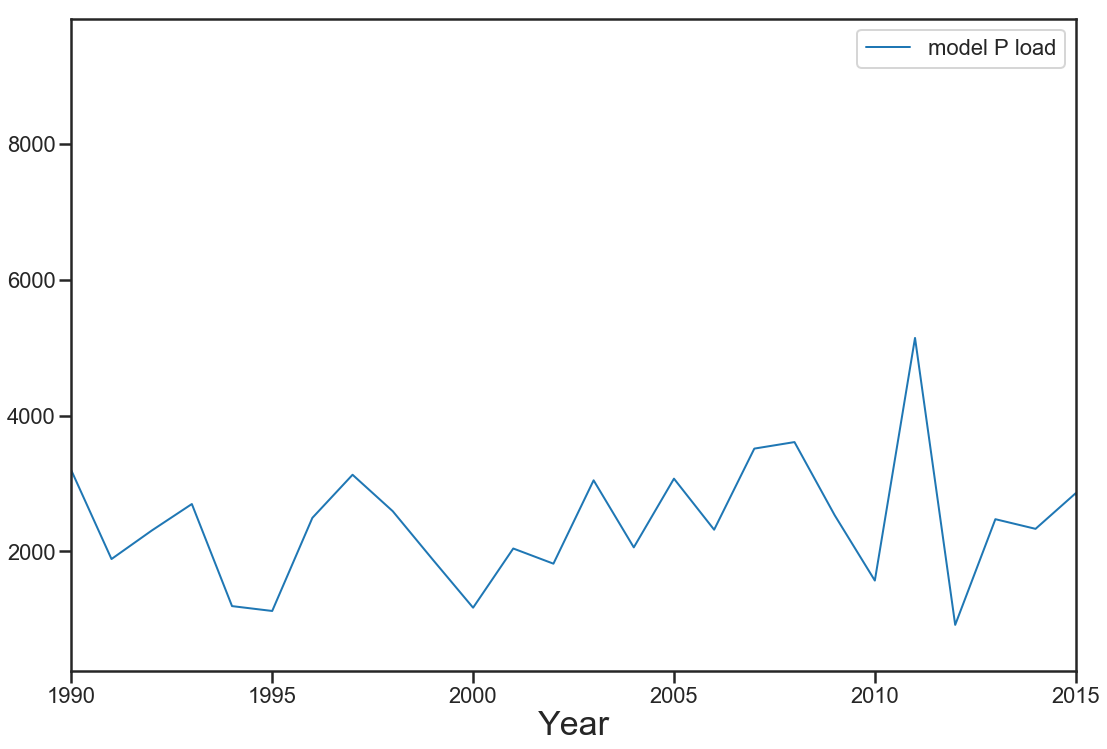

In [45]:
df.groupby(['Year']).mean().plot(y='model P load',xlim=(1990,2015))

In [46]:
x2= pd.date_range('1983-04-01','2015-12-31',freq='D')
df2=df.reindex(x2)

In [47]:
for c in df2.columns[3:]:
    df2[c] = pd.to_numeric(df2[c], errors='coerce')
    df2[c] = df2[c].interpolate(method='linear', limit=10)
df2.head()

,Year,Month,Day,Inflow volume [m3 d-1],Inflow temperature [°C],*Suspended sediment concentration [mg m-3],"*Orthophosphate, water, filtered, as phosphorus [mg m-3]","*Phosphorus, water, unfiltered, as phosphorus [mg m-3]","*Phosphorus, water, filtered, as phosphorus [mg m-3]","*Orthophosphate, water, filtered, as PO4 [mg m-3]",Inflow concentration of chlorophyll-a (Chla-P) [mg m-3],Inflow concentration of dissolved organic carbon (DOC) [mg m-3],Inflow concentration of dissolved inorganic carbon (DIC) [mg m-3],Inflow concentration of O2 [mg m-3],Inflow concentration of NO3 [mg m-3],Inflow concentration of NH4 [mg m-3],Inflow concentration of SO4 [mg m-3],Inflow concentration of aqueous iron (Fe2+) [mg m-3],Inflow concentration of Ca2+ [mg m-3],Inflow pH [-],Inflow concentration of CH4 [mg m-3],Inflow concentration of total solid iron (Fe3+) [mg m-3],Inflow concentration of aluminum (Al3+) [mg m-3],Inflow concentration of dissolved silica [mg m-3],"*Iron, suspended sediment, recoverable [mg m-3]","*Iron, water, unfiltered, recoverable [mg m-3]","*Iron, water, filtered [mg m-3]","*Suspended solids, water, unfiltered [mg m-3]",Date,P load,DOY,TP (unfilt) [mg m-3],model TP,model P load
1983-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9223372036854775808,NaN,NaN,NaN,NaN,NaN
1983-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9223372036854775808,NaN,NaN,NaN,NaN,NaN
1983-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9223372036854775808,NaN,NaN,NaN,NaN,NaN
1983-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9223372036854775808,NaN,NaN,NaN,NaN,NaN
1983-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9223372036854775808,NaN,NaN,NaN,NaN,NaN


In [48]:
# df2.to_csv('mau_P_load.csv')

In [49]:
tdf = tdf.dropna(subset=['TP (unfilt) [mg m-3]','*Suspended sediment concentration [mg m-3]'])

In [50]:
features = [tdf.columns[0], tdf.columns[2], tdf.columns[-2]]
target = [tdf.columns[-1]]
train = tdf.sample(frac=0.99, random_state=1)
test = tdf.loc[~tdf.index.isin(train.index)]

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor method score: 0.5608960946180095
mean_squared_error : 10389.327722680046
r2_score : 0.5529944371917106
mean_absolute_error : 39.46131751137938
median_absolute_error : 21.753716914352395
explained_variance_score : 0.5529990542114523


<Figure size 720x720 with 0 Axes>

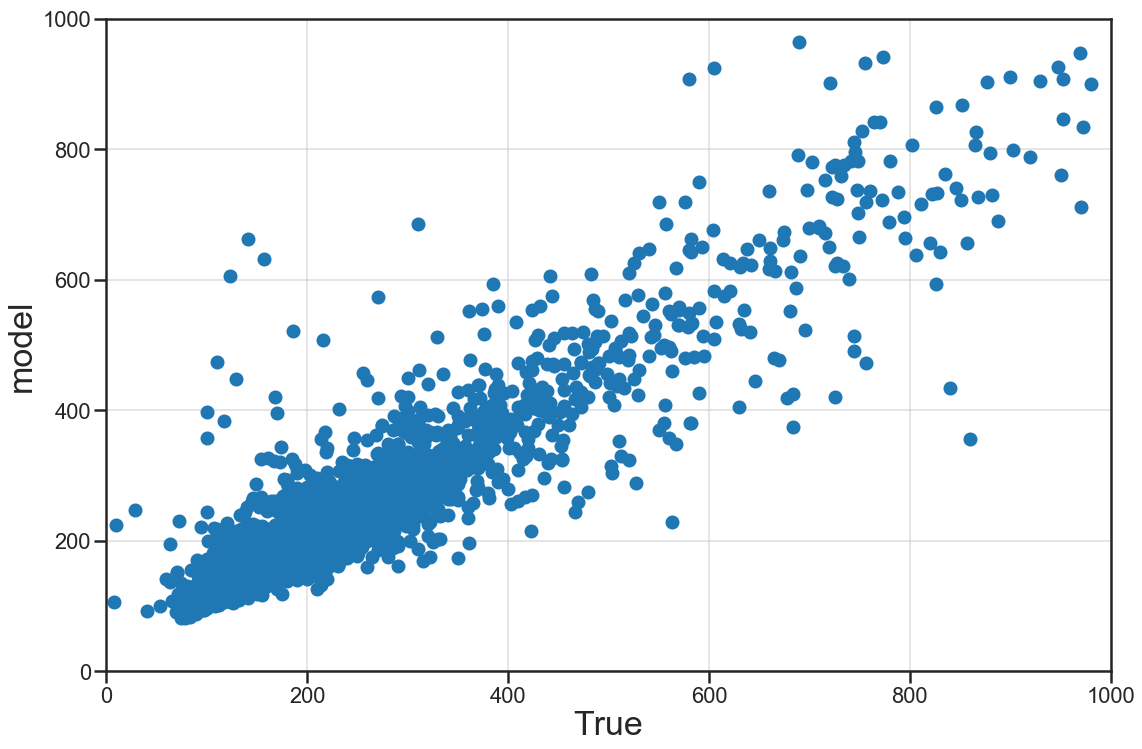

In [51]:
predicted_results = np.empty((len(models),len(test[target].values),))
results = {}
plt.figure(figsize=(10, 10)) 
for i,model in enumerate([RandomForestRegressor(n_estimators=10000, min_samples_leaf=5, n_jobs=6)]):
    name = str(model).split('(')[0]
    results[name] = {}
    model.fit(train[features], train[target])
    results[name] = {'score': model.score(test[features], test[target]), 'model':name}
    print(str(model).split('(')[0], 'method score:', results[name]['score'])
    
    for m in metrics:
        results[name][m.__name__] = m(model.predict(train[features]), train[target].values)
        print(m.__name__,':', results[name][m.__name__])
    predicted_results[i,:] = model.predict(test[features]).flatten()
    plt.figure()
    plt.scatter(x=train[target].values.flatten(), y=model.predict(train[features]).flatten())
#     plt.scatter(model.predict(test[features]), test[target].values)
#     plt.ylim(0,10)
    plt.ylabel('model')
    plt.xlabel('True')
    # plt.xlim(0,10)
    plt.grid(alpha=0.5)
    plt.ylim(0,1000)
    plt.xlim(0,1000)
    plt.show()

In [52]:
df=df.set_index('Date')

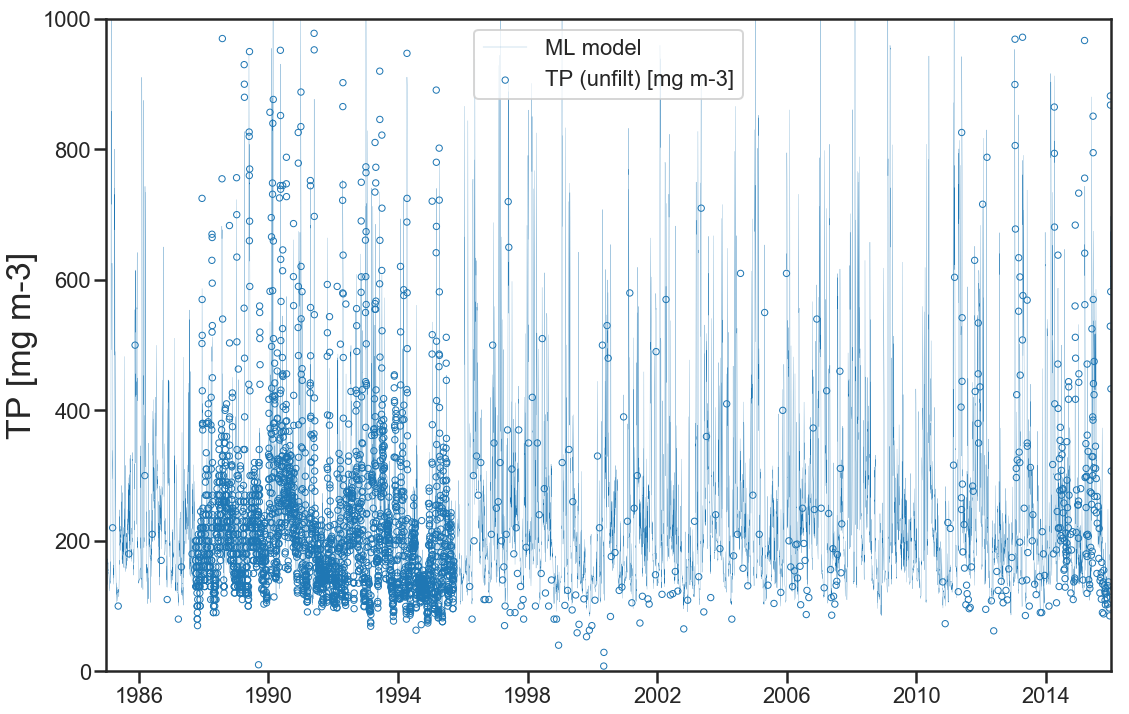

In [53]:
plt.plot(df.index, df['model TP'], label='ML model',lw=0.2)
plt.scatter(df.index, df['TP (unfilt) [mg m-3]'], facecolor='none', edgecolor=sns.color_palette()[0], lw=1,s=40)
plt.xlim(datetime(1985,1,1),datetime(2016,1,1))
plt.ylim(0,1000)
plt.ylabel('TP [mg m-3]')
plt.legend(frameon=1)

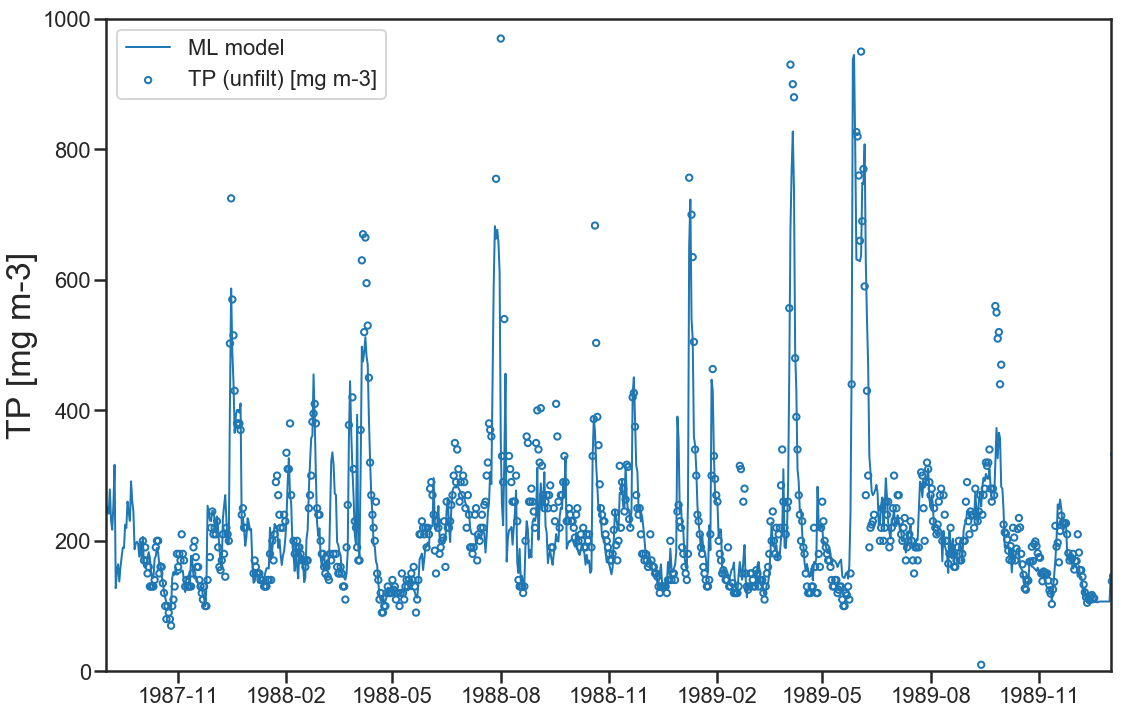

In [54]:
plt.plot(df.index, df['model TP'], label='ML model')
plt.scatter(df.index, df['TP (unfilt) [mg m-3]'], facecolor='none', edgecolor=sns.color_palette()[0], lw=2,s=40)
plt.xlim(datetime(1987,9,1),datetime(1990,1,1))
plt.ylim(0,1000)
plt.ylabel('TP [mg m-3]')
plt.legend(frameon=1)

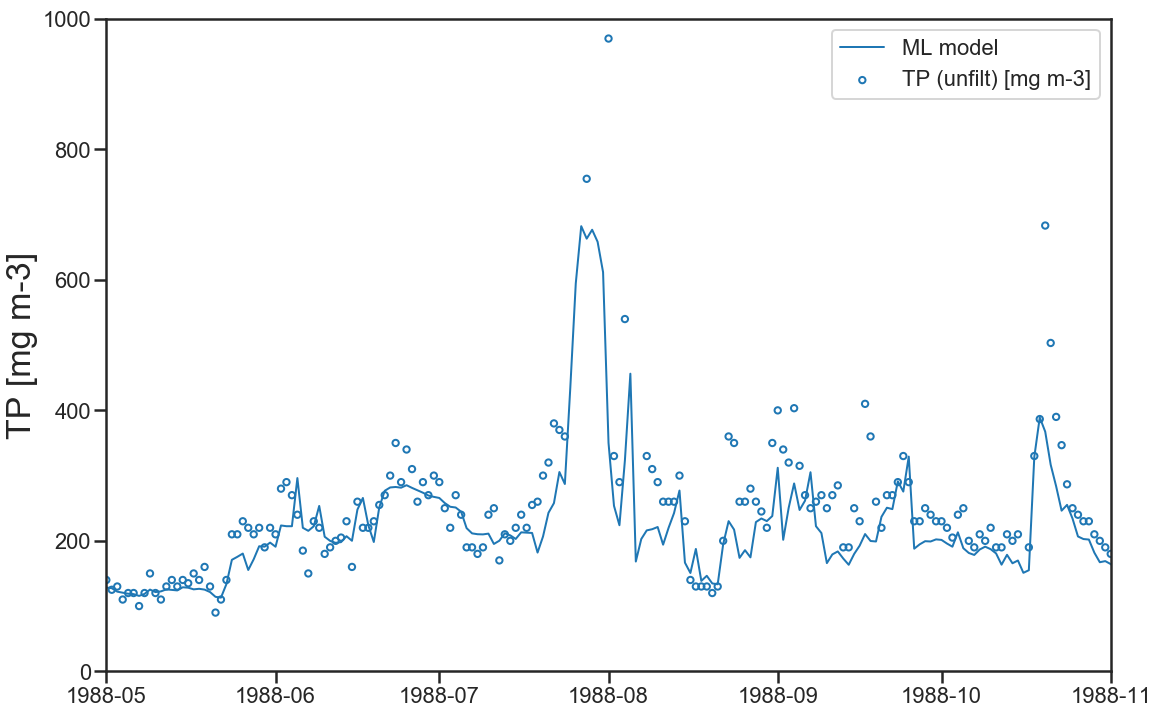

In [55]:
plt.plot(df.index, df['model TP'], label='ML model')
plt.scatter(df.index, df['TP (unfilt) [mg m-3]'], facecolor='none', edgecolor=sns.color_palette()[0], lw=2,s=40)
plt.xlim(datetime(1988,5,1),datetime(1988,11,1))
plt.ylim(0,1000)
plt.ylabel('TP [mg m-3]')
plt.legend(frameon=1)

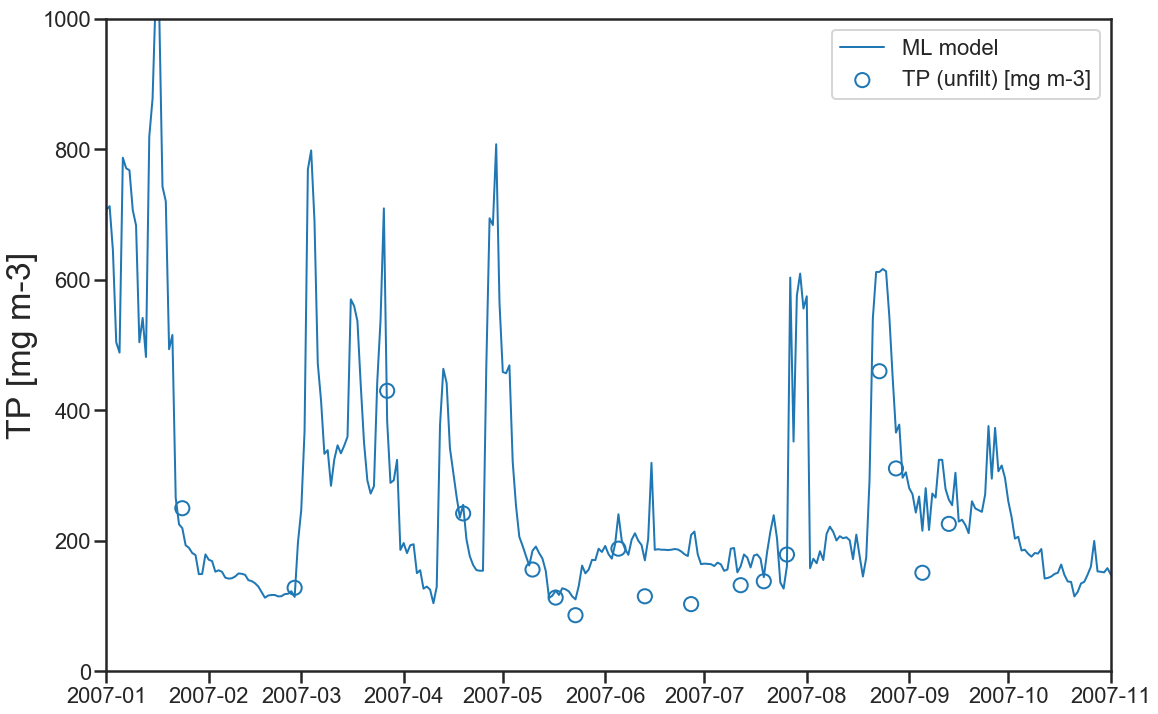

In [56]:
year = 2007
plt.plot(df.index, df['model TP'], label='ML model')
plt.scatter(df.index, df['TP (unfilt) [mg m-3]'], facecolor='none', edgecolor=sns.color_palette()[0], lw=2,s=200)
plt.xlim(datetime(year,1,1),datetime(year,11,1))
plt.ylim(0,1000)
plt.ylabel('TP [mg m-3]')
plt.legend(frameon=1)

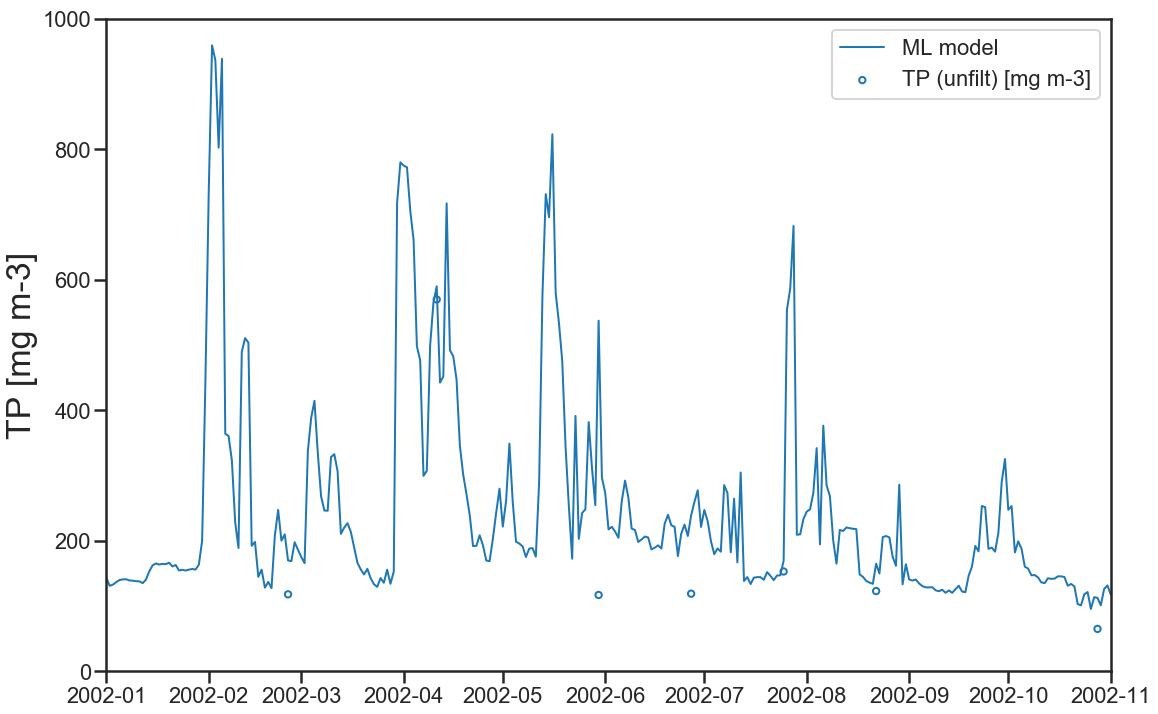

In [57]:
plt.plot(df.index, df['model TP'], label='ML model')
plt.scatter(df.index, df['TP (unfilt) [mg m-3]'], facecolor='none', edgecolor=sns.color_palette()[0], lw=2,s=40)
plt.xlim(datetime(2002,1,1),datetime(2002,11,1))
plt.ylim(0,1000)
plt.ylabel('TP [mg m-3]')
plt.legend(frameon=1)

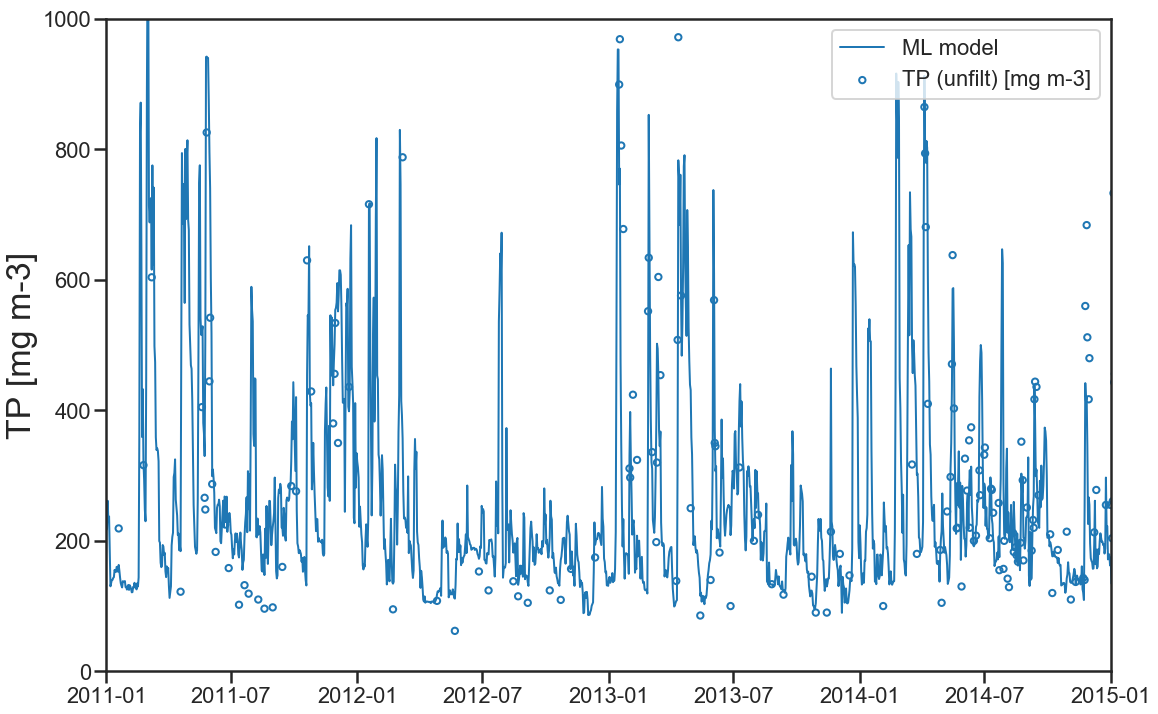

In [58]:
plt.plot(df.index, df['model TP'], label='ML model')
plt.scatter(df.index, df['TP (unfilt) [mg m-3]'], facecolor='none', edgecolor=sns.color_palette()[0], lw=2,s=40)
plt.xlim(datetime(2011,1,1),datetime(2015,1,1))
plt.ylim(0,1000)
plt.ylabel('TP [mg m-3]')
plt.legend(frameon=1)

(0, 12000)

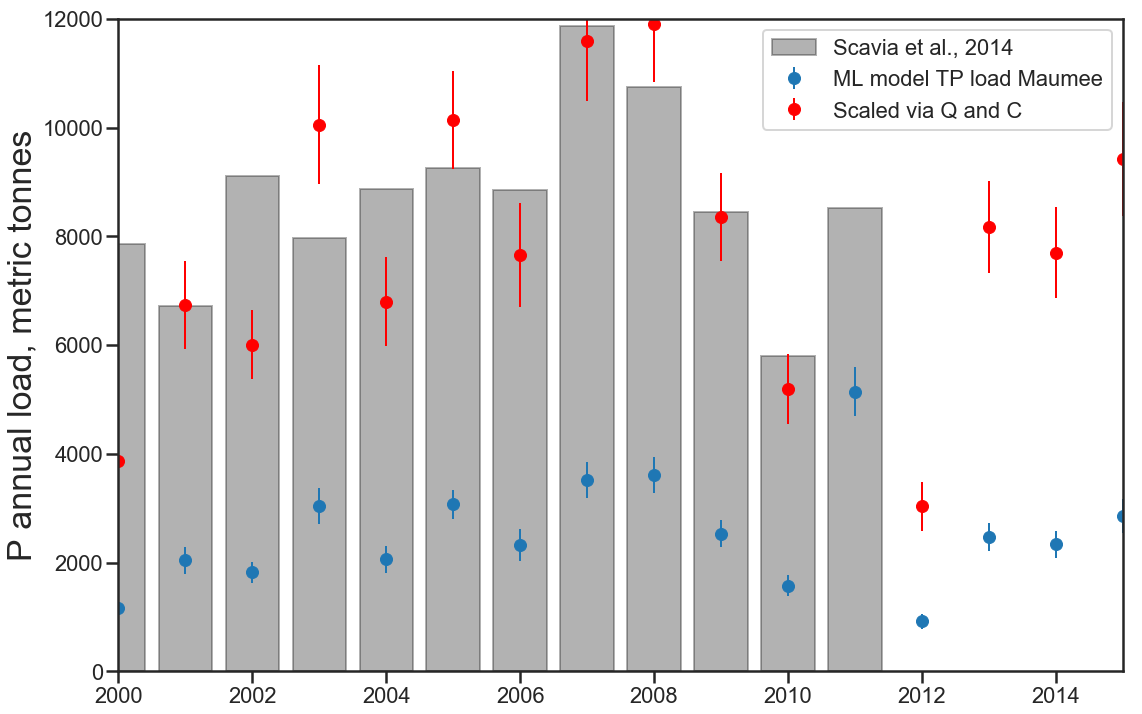

In [59]:
# plt.scatter(df.groupby(['Year']).mean().index, df.groupby(['Year']).mean()['model P load'], label='ML')
plt.bar(scavia[scavia.columns[0]], scavia[scavia.columns[1]], label='Scavia et al., 2014', color='k', alpha=0.3, edgecolor='k')
plt.errorbar(df.groupby(['Year']).mean().index, df.groupby(['Year']).mean()['model P load'], yerr=50*365*df.groupby(['Year']).mean()['Inflow volume [m3 d-1]']*1e-9, fmt='o', label='ML model TP load Maumee')
plt.errorbar(df.groupby(['Year']).mean().index, 3.3*df.groupby(['Year']).mean()['model P load'], yerr=3.3*50*365*df.groupby(['Year']).mean()['Inflow volume [m3 d-1]']*1e-9, fmt='o', label='Scaled via Q and C', c='r')
plt.legend(loc=1)
plt.ylabel('P annual load, metric tonnes')
plt.xlim(2000,2015)
plt.ylim(0,12000)

Text(0,0.5,'TP [mg m-3]')

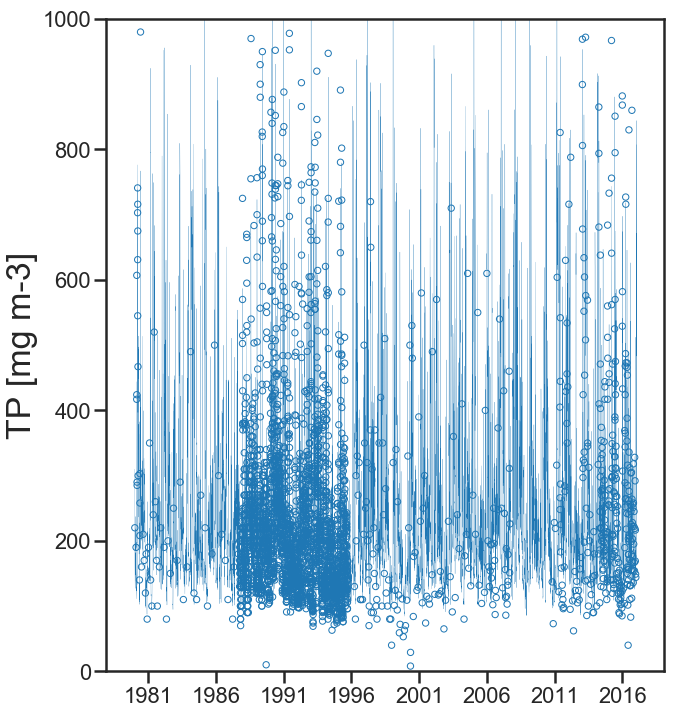

In [60]:
fig = plt.figure(figsize=(10,12))
plt.ylabel('TP concetration [mg m-3]')
plt.ylim(0,1000)
plt.xlabel('')
plt.plot(df.index, df['model TP'], label='ML model',lw=0.2)
plt.scatter(df.index, df['TP (unfilt) [mg m-3]'], facecolor='none', edgecolor=sns.color_palette()[0], lw=1,s=40)
# plt.xlim(datetime(1985,1,1),datetime(2018,1,1))
plt.ylabel('TP [mg m-3]')
# plt.legend(frameon=1)